In [2]:
# ===============================
# 🧠 Unsupervised Learning Practical
# Dataset: Student Study & Lifestyle Data
# ===============================

# %% Step 1 - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# %% Step 2 - Load Data
df = pd.read_csv("students.csv")  # <-- replace with your filename



In [4]:
# %% Step 3 - Inspect Data
print(df.head())
print("\nShape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [6]:

# %% Step 4 - Drop Label Column (Exam_Score)
df_unsupervised = df.drop(columns=['Exam_Score'])

# %% Step 5 - Encode Categorical Columns
cat_cols = df_unsupervised.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    df_unsupervised[col] = le.fit_transform(df_unsupervised[col])



In [7]:
# %% Step 6 - Scale Numeric Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_unsupervised)

# %% Step 7 - Apply PCA (for visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])


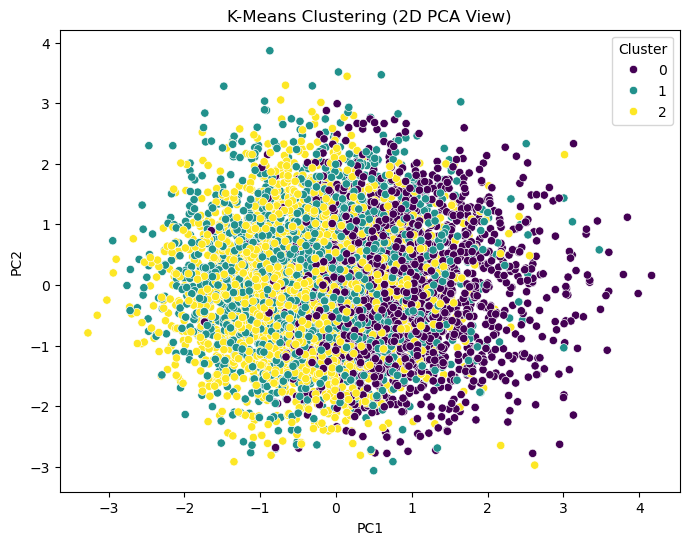

In [8]:

# %% Step 8 - Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(scaled_data)

# %% Step 9 - Visualize K-Means Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title("K-Means Clustering (2D PCA View)")
plt.show()


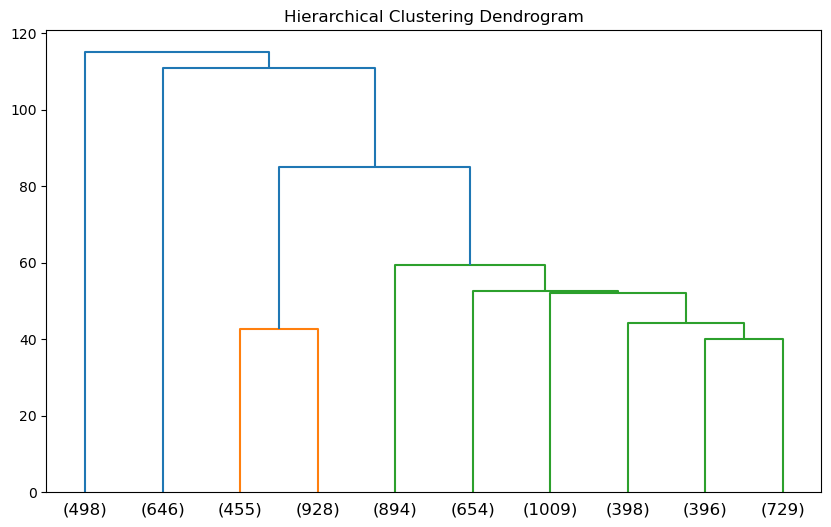

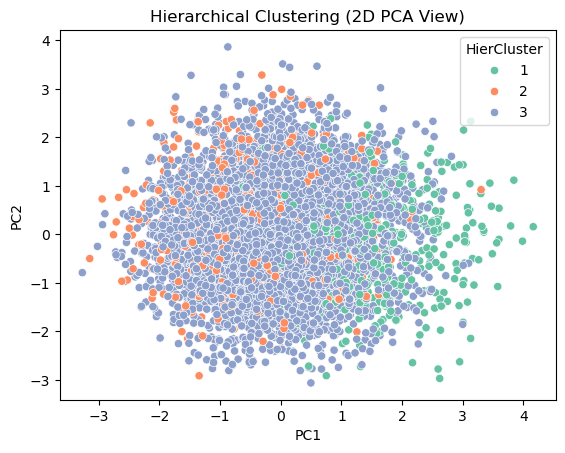

Silhouette Score (KMeans): 0.039
         Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
Cluster                                                                         
0            19.390444   81.972008              1.194981             1.198359   
1            20.173418   79.581247              1.215749             1.187528   
2            20.307528   78.582121              1.246364             1.222840   

         Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
Cluster                                                             
0                          0.540058     6.807915        73.414575   
1                          0.619026     7.069640        75.196632   
2                          0.624038     7.186912        76.419589   

         Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
Cluster                                                                        
0                1.328668         0.902510           1.

In [9]:

# %% Step 10 - Hierarchical Clustering (Bonus)
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# %% Step 11 - Assign Hierarchical Clusters
cluster_labels = fcluster(linked, 3, criterion='maxclust')
pca_df['HierCluster'] = cluster_labels

# %% Step 12 - Compare K-Means vs Hierarchical Clusters
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='HierCluster', palette='Set2')
plt.title("Hierarchical Clustering (2D PCA View)")
plt.show()

# %% Step 13 - Evaluate Cluster Quality (Silhouette Score)
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score (KMeans): {score:.3f}")

# %% Step 14 - Analyze Cluster Profiles
df_clusters = df_unsupervised.copy()
df_clusters['Cluster'] = kmeans.labels_
print(df_clusters.groupby('Cluster').mean())
